# Age Detection - Human Faces, 18-60 years





## About Dataset
Age Detection - Human Faces Classification
The dataset is created on the basis of Selfies and ID Dataset
The dataset is a collection of images of people from various age groups. It has been specifically curated for age prediction and face recognition tasks. The dataset encompasses diverse demographics, ethnicities, and genders.



Age groups of people in the dataset: 18-20, 21-30, 31-40, 41-50 and 51-60



The dataset is a valuable resource for researchers, developers, and organizations working on age prediction and face recognition to train, evaluate, and fine-tune AI models for real-world applications. It can be applied in various domains like psychology, market research, and personalized advertising.



💴 For Commercial Usage: Full version of the dataset includes 95 000+ photos of people, leave a request on TrainingData to buy the dataset




Metadata for the full dataset:
assignment_id - unique identifier of the media file
worker_id - unique identifier of the person
age - age of the person
true_gender - gender of the person
country - country of the person
ethnicity - ethnicity of the person
photo_1_extension, photo_2_extension, …, photo_15_extension - photo extensions in the dataset
photo_1_resolution, photo_2_resolution, …, photo_15_resolution - photo resolution in the dataset


Data source: https://www.kaggle.com/datasets/trainingdatapro/age-detection-human-faces-18-60-years/data


In [39]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize
from skimage import color
from PIL import Image
import cv2
import os

import warnings
warnings.filterwarnings('ignore')

## Read data

In [5]:
"C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Age Detection - Human Faces, 18-60 years/train/{age}/*"

'C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Age Detection - Human Faces, 18-60 years/train/{age}/*'

In [2]:
groups = ['18-20', '21-30', '31-40', '41-50', '51-60']

In [3]:
def read_data(set_type):
    
    images = []
    groups = ['18-20', '21-30', '31-40', '41-50', '51-60']

    for group in groups:
        
        files = glob(f"C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Age Detection - Human Faces, 18-60 years/{set_type}/{group}/*")

        images.extend(files)
        
    images = [path.replace('\\', '/') for path in images]
    
    labels = [path.split('.')[0].split('/')[-2] for path in images]
    
    return images, labels


In [5]:
train_images, train_labels = read_data('train')

In [6]:
train_images[:2]

['C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Age Detection - Human Faces, 18-60 years/train/18-20/0.jpg',
 'C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Age Detection - Human Faces, 18-60 years/train/18-20/1.jpg']

In [60]:
test_images, test_labels = read_data('test')

## Read Images

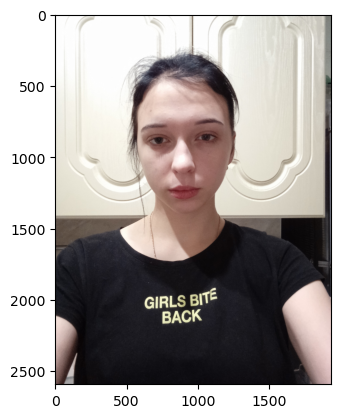

In [14]:
img = plt.imread(train_images[0])
plt.imshow(img)

In [56]:
def image_to_df(images, labels):
    
    df = pd.DataFrame(columns = ['img', 'label'])

    for filename, label in zip(images, labels):
        
        img = cv2.imread(filename)
        
        df = df.append({
        'img':img,
        'label':label
    }, ignore_index=True)
        
    return df

In [57]:
train = image_to_df(train_images, train_labels)

In [58]:
train.head()

,img,label
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",18-20
1,"[[[57, 92, 125], [63, 98, 131], [59, 94, 127],...",18-20
2,"[[[42, 69, 79], [47, 74, 84], [61, 87, 99], [5...",18-20
3,"[[[204, 200, 229], [202, 198, 227], [200, 196,...",18-20
4,"[[[122, 129, 122], [119, 126, 119], [120, 127,...",18-20


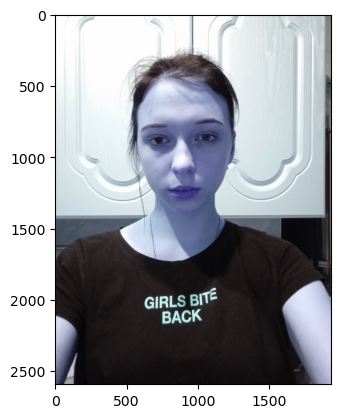

In [59]:
plt.imshow(train['img'][0])

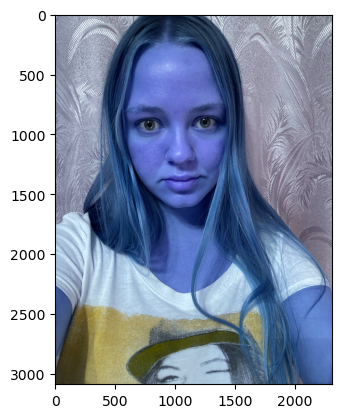

In [61]:
test = image_to_df(test_images, test_labels)
plt.imshow(test['img'][0])

In [62]:
path = "C:/Users/Oamen/OneDrive/Documents/DATA PROJECTS/Project_image_data_generation_Age Detection - Human Faces, 18-60 years/train.csv"
train.to_csv(path, index = False)

In [63]:
path = "C:/Users/Oamen/OneDrive/Documents/DATA PROJECTS/Project_image_data_generation_Age Detection - Human Faces, 18-60 years/test.csv"
test.to_csv(path, index = False)